### Import Dependencies

In [9]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Basic Processing

In [10]:
df = pd.read_csv('data/processed/ChurnModelling_Missing_Values_Handled.csv')
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [11]:
print(f"No of Rows : {len(df)}")

No of Rows : 10000


### Outlier Detection Techniques

#### Distribution Plots

In [12]:
categorical_columns = ['Geography',
                       'Gender',
                       'HasCrCard',
                       'IsActiveMember',
                       'Exited']

numerical_columns = ['Age',
                     'CreditScore',
                     'Tenure',
                     'Balance',
                     'EstimatedSalary',
                     'NumOfProducts']

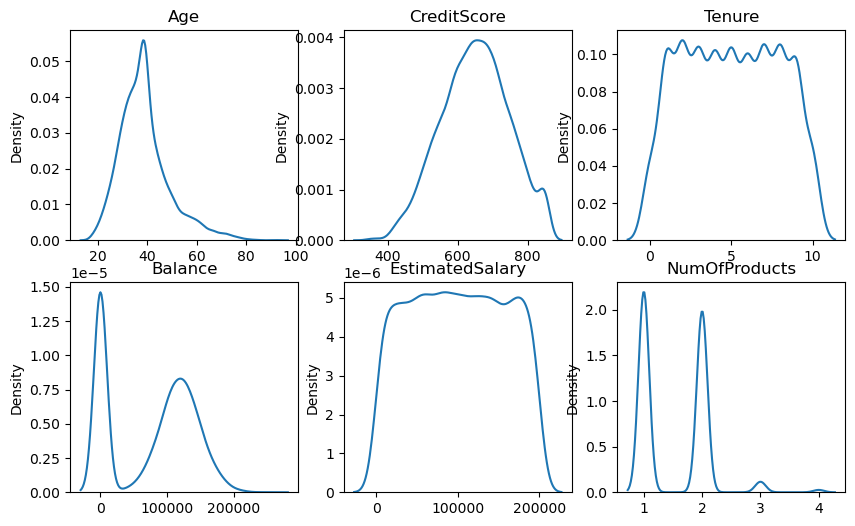

In [16]:
fig, axes = plt.subplots(2,3, figsize=(10,6))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(data=df[col], ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')

plt.show()

A `kdeplot` is a function in the Seaborn library (built on top of Matplotlib) that creates a Kernel Density Estimate (KDE) plot. This plot visualizes the probability density function of a continuous variable, providing a smooth curve that represents the distribution of data points. Unlike a histogram, which shows counts in bins, a KDE plot estimates the underlying distribution and displays it as a continuous line, making it easier to see patterns and compare distributions.

Observations
- Balance is bi-modal
- Age - right-skewed
- CreditScore - left-skewed
- Tenure, EstimatedSalary - Constant
- NumOfProducts - 4 peaks, tends to be a categorical variable rather than a numerical variable. Discrete means it's categorical.

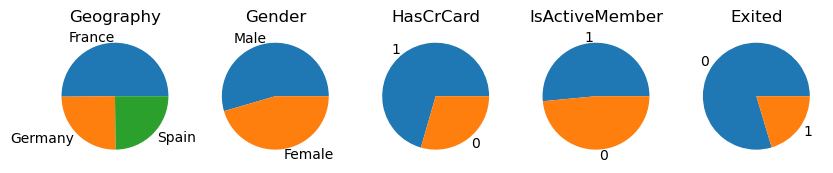

In [18]:
fig, axes = plt.subplots(1, 5, figsize=(10, 8))

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='pie', ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_ylabel('')

plt.show()

#### Box Plots

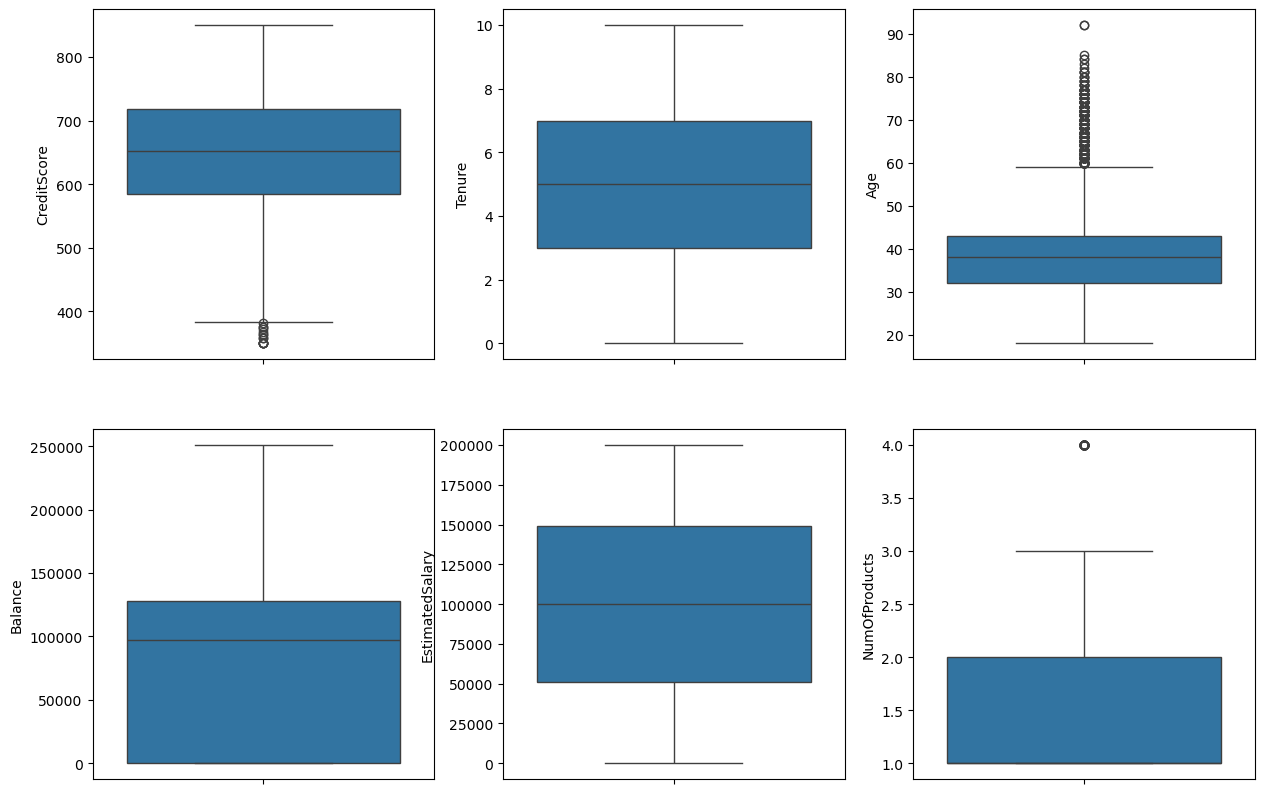

In [21]:
fig, axes = plt.subplots(2,3, figsize=(15,10))

sns.boxplot(data=df["CreditScore"], ax=axes[0,0])
sns.boxplot(data=df["Tenure"], ax=axes[0,1])
sns.boxplot(data=df["Age"], ax=axes[0,2])
sns.boxplot(data=df["Balance"], ax=axes[1,0])
sns.boxplot(data=df["EstimatedSalary"], ax=axes[1,1])
sns.boxplot(data=df["NumOfProducts"], ax=axes[1,2])

plt.show()

- Box plots identify anomalies

#### Emperical Rule

In [22]:
def find_anomaly(data):
    mean = data.mean()
    std=data.std()
    upperbound = mean + 3*std
    lowerbound = mean - 3*std

    return (data > upperbound) | (data <lowerbound)

In [24]:
numerical_columns = ['Age',
                     'CreditScore',
                     'Tenure',
                     'Balance',
                     'EstimatedSalary',]

for col in numerical_columns:
    n_outliers= find_anomaly(df[col]).sum()
    n_outlies_presentage = round((n_outliers / len(df)) * 100, 2)
    print(f'{col}: {n_outliers} outliers ({n_outlies_presentage}%)')

Age: 144 outliers (1.44%)
CreditScore: 8 outliers (0.08%)
Tenure: 0 outliers (0.0%)
Balance: 0 outliers (0.0%)
EstimatedSalary: 0 outliers (0.0%)


#### IQR Method

In [25]:
def find_anomaly(data):
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3 - Q1

    upperbound = Q3 + 1.5 * IQR
    lowerbound = Q1 - 1.5 * IQR    

    return (data > upperbound) | (data <lowerbound)

for col in numerical_columns:
    n_outliers= find_anomaly(df[col]).sum()
    n_outlies_presentage = round((n_outliers / len(df)) * 100, 2)
    print(f'{col}: {n_outliers} outliers ({n_outlies_presentage}%)')

Age: 501 outliers (5.01%)
CreditScore: 15 outliers (0.15%)
Tenure: 0 outliers (0.0%)
Balance: 0 outliers (0.0%)
EstimatedSalary: 0 outliers (0.0%)


The reason why we didn't remove outliers is because it's based on business decisions.

In [26]:
df.to_csv(
    'data/processed/ChurnModelling_Outliers_Handled.csv', 
    index=False
)